# Exploratory data analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from lib.function_test import get_weekday, get_nameCategory, get_only_date

In [2]:
#from vizual_data import vizualCount
df_data = pd.read_csv("./Data/FR_youtube_trending_data.csv") 

df_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11T16:00:08Z,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12T00:00:00Z,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ..."
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12T08:00:05Z,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12T00:00:00Z,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...


### Missing value

<AxesSubplot:>

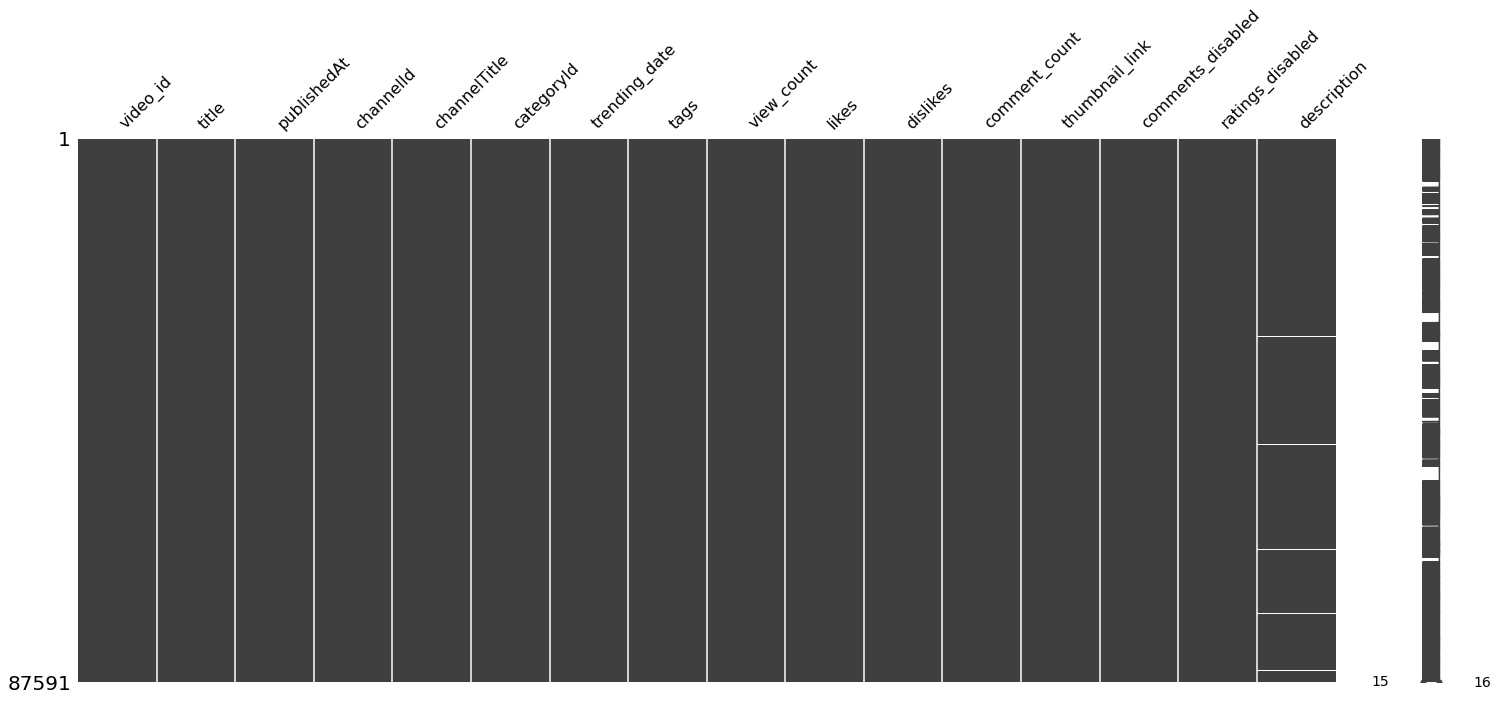

In [3]:
msno.matrix(df_data)

### The available categories

In [4]:
df_data['categoryId'] = df_data['categoryId'].apply(lambda x: get_nameCategory(int(x)))

infoByCategory = df_data.groupby('categoryId')['view_count', 'likes', 'dislikes', 'comment_count'].sum()
infoByCategory

/var/folders/56/_q_c1v7j0_1dl5kshds6cyfw0000gn/T/ipykernel_6573/433301517.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  infoByCategory = df_data.groupby('categoryId')['view_count', 'likes', 'dislikes', 'comment_count'].sum()


,view_count,likes,dislikes,comment_count
categoryId,,,,
Autos & Vehicles,579833471,46601856,503254,2799666
Comedy,5609396609,522539482,6383276,18723335
Education,998028265,41152758,600166,2434296
Entertainment,15612588702,1336233991,17679764,74015845
Film & Animation,964773135,46553855,758389,3375822
Gaming,6522799695,365017331,7453412,25990922
Howto & Style,812984718,67602604,1072235,2704021
Music,52126078477,4015497642,69535054,504374870
News & Politics,875739790,25094215,1901913,3833439


### How many days on average stays a video on in the trending list ?

In [5]:
df_TrendingTime = df_data.groupby(['video_id', 'publishedAt', 'categoryId'])['trending_date'].value_counts()
df_TrendingTime = pd.DataFrame(df_TrendingTime)
df_TrendingTime.columns = ['Nbr']
df_TrendingTime = df_TrendingTime.reset_index()
del df_TrendingTime['Nbr']

In [6]:
df_TrendingTime

,video_id,publishedAt,categoryId,trending_date
0,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-12T00:00:00Z
1,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-13T00:00:00Z
2,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-14T00:00:00Z
3,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-15T00:00:00Z
4,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-16T00:00:00Z
...,...,...,...,...
83861,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-04T00:00:00Z
83862,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-05T00:00:00Z
83863,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-06T00:00:00Z
83864,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-07T00:00:00Z


**Time spent in trends in day**

In [7]:
df_TrendingDay = df_TrendingTime.groupby('video_id').count()
dfp = df_TrendingDay.trending_date.describe() 
dfp = dfp.apply(lambda x : round(x, 1))
dfp

count    18103.0
mean         4.6
std          1.4
min          1.0
25%          4.0
50%          5.0
75%          6.0
max         10.0
Name: trending_date, dtype: float64

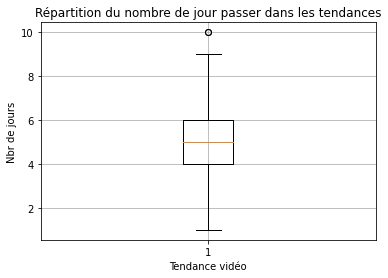

In [8]:
plt.boxplot(df_TrendingDay.trending_date)
plt.title("Répartition du nombre de jour passer dans les tendances")
plt.xlabel("Tendance vidéo")
plt.ylabel("Nbr de jours")
plt.grid()
plt.show()

### How long does it take for a video to be in the trending list ?

In [9]:
df_TrendingTime.drop_duplicates(subset ="video_id", keep = 'first', inplace=True)

In [10]:
df_TrendingTime[ df_TrendingTime['publishedAt'] == df_TrendingTime['publishedAt']]
df_TrendingTime[['publishedAt','trending_date']] = df_TrendingTime[['publishedAt','trending_date']].apply(pd.to_datetime)

In [11]:
from datetime import datetime

def days_between(d1, d2):
    return abs((d2 - d1).days)

def hours_between(d1, d2):
    a = abs((d2 - d1).days)*86400
    return int((a+abs((d2 - d1).seconds))/3600)

In [12]:
df_TrendingTime['days_between'] = list(map(lambda x, y : days_between(x, y), df_TrendingTime['publishedAt'],df_TrendingTime['trending_date']))
df_TrendingTime['hours_between'] = list(map(lambda x, y : hours_between(x, y), df_TrendingTime['publishedAt'], df_TrendingTime['trending_date']))
df_TrendingTime

,video_id,publishedAt,categoryId,trending_date,days_between,hours_between
0,--14w5SOEUs,2021-06-10 16:00:00+00:00,Music,2021-06-12 00:00:00+00:00,1,32
7,--2Us2lFR8Y,2021-02-11 17:02:05+00:00,Entertainment,2021-02-12 00:00:00+00:00,0,6
13,--38nmkJJmE,2021-03-28 11:14:36+00:00,Gaming,2021-03-29 00:00:00+00:00,0,12
19,--4D57S8fLo,2020-09-06 15:00:32+00:00,Entertainment,2020-09-07 00:00:00+00:00,0,8
25,--PNXe6E0_Y,2021-03-05 16:57:06+00:00,Music,2021-03-06 00:00:00+00:00,0,7
...,...,...,...,...,...,...
83839,zzC9w5TbDvk,2020-09-20 16:16:06+00:00,Howto & Style,2020-09-21 00:00:00+00:00,0,7
83845,zzRM7bCvdaQ,2020-11-12 16:00:26+00:00,Comedy,2020-11-14 00:00:00+00:00,1,31
83850,zzX_eqBD-qE,2021-01-27 16:44:20+00:00,Travel & Events,2021-01-28 00:00:00+00:00,0,7
83854,zzd4ydafGR0,2021-02-12 05:03:49+00:00,Music,2021-02-12 00:00:00+00:00,1,42


In [13]:
df_result = df_TrendingTime.describe()
df_result = df_result.apply(lambda x : round(x, 1))
df_result

,days_between,hours_between
count,18103.0,18103.0
mean,0.5,20.3
std,1.0,23.8
min,0.0,0.0
25%,0.0,7.0
50%,0.0,12.0
75%,1.0,31.0
max,28.0,688.0


In [14]:
def CategoryDescrip(l):
    df_result = pd.DataFrame()
    for i in l:
        df_resultCategoty = df_TrendingTime[ df_TrendingTime.categoryId == i]
        df_resultProvi = df_resultCategoty.hours_between.describe()
        df_resultProvi = pd.DataFrame(df_resultProvi)
        df_result = pd.concat([df_result, df_resultProvi], axis=1)
    df_result.columns = l
    df_result = df_result.apply(lambda x : round(x, 1))

    return df_result

In [15]:
listCategory = list(infoByCategory.index)    
df_CategoryDescrip = CategoryDescrip(listCategory)
df_CategoryDescrip

,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events
count,516.0,1622.0,496.0,4286.0,424.0,1704.0,714.0,3710.0,602.0,905.0,60.0,641.0,2320.0,103.0
mean,19.2,18.1,18.9,19.9,20.2,21.9,22.9,23.2,17.6,19.5,19.8,18.0,18.3,19.6
std,16.1,18.8,19.0,23.8,24.1,20.7,23.8,30.9,24.5,21.4,15.9,22.3,18.7,25.3
min,3.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0,3.0
25%,7.0,7.0,7.0,7.0,7.0,8.0,7.0,7.0,5.0,7.0,12.0,7.0,5.0,7.0
50%,13.0,11.0,12.0,12.0,11.0,14.0,15.5,13.0,9.0,13.0,13.5,8.0,12.0,10.0
75%,31.0,30.0,31.0,31.0,30.0,31.0,31.0,32.0,27.0,30.0,29.8,30.0,30.0,29.5
max,127.0,196.0,194.0,688.0,254.0,327.0,342.0,658.0,342.0,381.0,109.0,293.0,206.0,136.0


In [16]:
df_CategoryDescrip1 = df_CategoryDescrip.copy()
df_CategoryDescrip1['Globale'] = list(df_result['hours_between'])
df_CategoryDescrip1 = df_CategoryDescrip1.drop(['count', 'mean', 'std'])

In [17]:
df_pro = pd.DataFrame()
for i in list(infoByCategory.index):
    df_pro1 = pd.DataFrame()
    df_pro1[i] = list(df_TrendingTime[df_TrendingTime['categoryId'] == i].hours_between)
    df_pro = pd.concat([df_pro, df_pro1])

In [18]:
df_pro = pd.concat([df_pro, df_TrendingTime.hours_between])
df_pro.rename(columns={0: 'All Categorie'}, inplace=True)
df_pro.describe()

,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events,All Categorie
count,516.000000,1622.000000,496.000000,4286.000000,424.000000,1704.000000,714.000000,3710.000000,602.000000,905.000000,60.000000,641.000000,2320.000000,103.000000,18103.000000
mean,19.186047,18.142417,18.937500,19.912273,20.250000,21.935446,22.906162,23.215903,17.634551,19.508287,19.816667,17.996880,18.331466,19.631068,20.331492
std,16.143780,18.833340,19.012014,23.789710,24.051044,20.685619,23.753016,30.868013,24.500589,21.360843,15.894239,22.254634,18.660445,25.320685,23.817686
min,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,3.000000,0.000000
25%,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,5.000000,7.000000,12.000000,7.000000,5.000000,7.000000,7.000000
50%,13.000000,11.000000,12.000000,12.000000,11.000000,14.000000,15.500000,13.000000,9.000000,13.000000,13.500000,8.000000,12.000000,10.000000,12.000000
75%,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,31.000000,32.000000,27.000000,30.000000,29.750000,30.000000,30.000000,29.500000,31.000000
max,127.000000,196.000000,194.000000,688.000000,254.000000,327.000000,342.000000,658.000000,342.000000,381.000000,109.000000,293.000000,206.000000,136.000000,688.000000


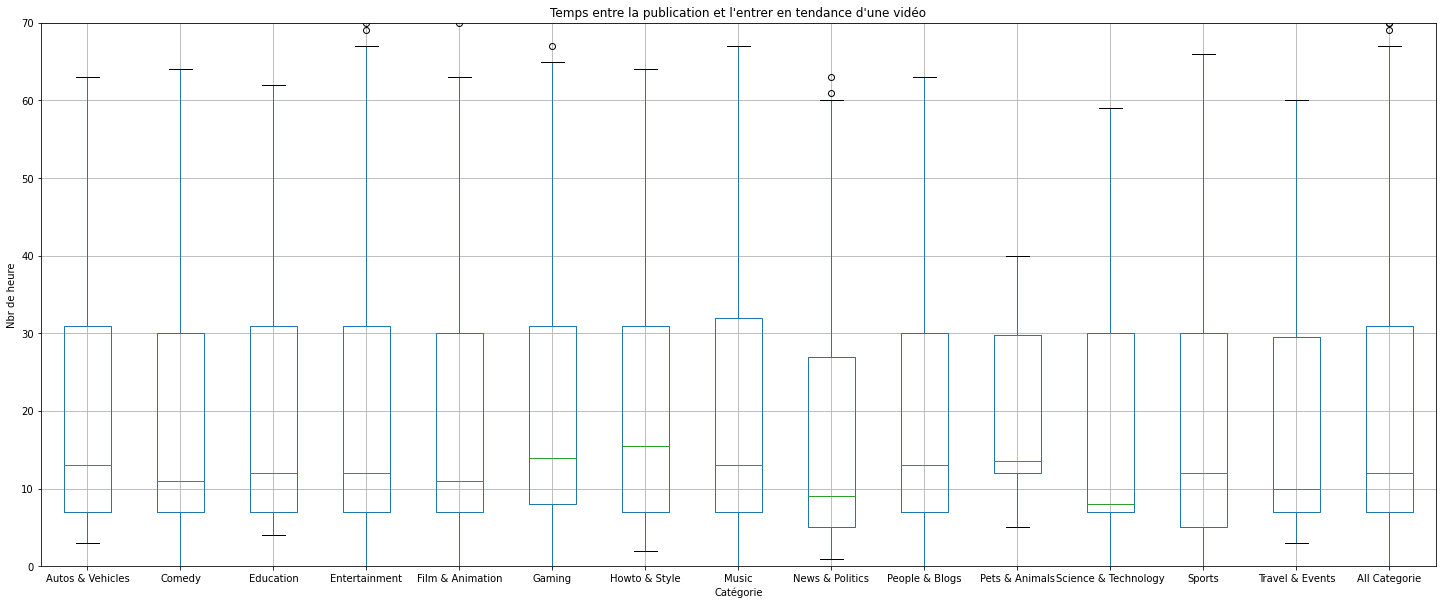

In [19]:
plt.rcParams['figure.figsize'] = [25, 10]
df_pro.boxplot()
plt.title("Temps entre la publication et l'entrer en tendance d'une vidéo")
plt.xlabel("Catégorie")
plt.ylabel("Nbr de heure")
plt.ylim(0, 70)
plt.grid(True)
plt.show()

### What is the trending's list made of ?

In [20]:
from functools import reduce

a = list(df_CategoryDescrip.iloc[0, :])
b = int(reduce(lambda x, y : x+y, a))
a = list(map(lambda x : round(x*100/b, 2), a))
df_CategoryDescrip.loc["Video %"] = a

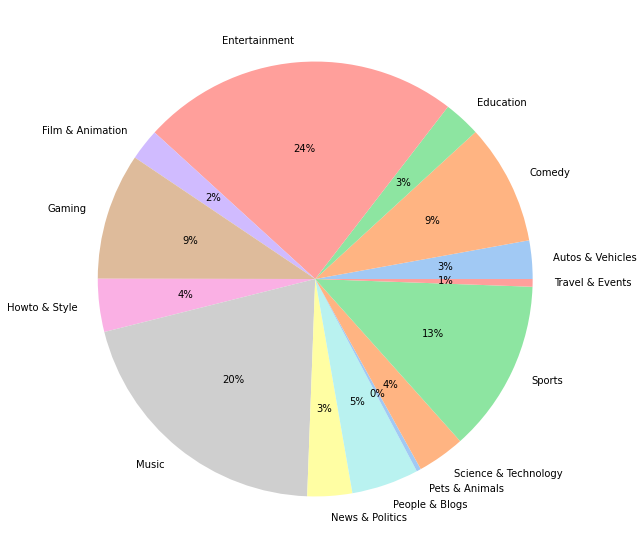

In [21]:
a = df_CategoryDescrip.T

colors = sns.color_palette('pastel')[0:14]

plt.rcParams['figure.figsize'] = [10, 10]
plt.pie(a.iloc[:,-1], labels=a.index, colors = colors, autopct='%.0f%%')
plt.show()

### Weekly Evolution for the number of view 

In [22]:
df1 = pd.DataFrame(df_data)

df1['publishedAt'] = df1['publishedAt'].apply(lambda x: get_weekday(x))
df1['trending_date'] = df1['trending_date'].apply(lambda x: get_weekday(x))
df1.drop_duplicates(subset ="video_id", keep = 'first', inplace=True)
#df1.groupby('video_id').count()

In [23]:
df1.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,Sports,3,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,Entertainment,3,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,3,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,Music,3,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,Comedy,3,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ..."
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,3,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,Entertainment,3,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...


In [24]:
def viewPerdayData(publishedAt_or_trending_date, df1):

    viewPerday = df1.groupby(publishedAt_or_trending_date)['view_count'].sum()
    for i in range(len(viewPerday)):
        week=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        viewPerday = list(viewPerday)
        
    return viewPerday, week

In [25]:
viewPublish, week = viewPerdayData('publishedAt', df1)
viewTrending, week = viewPerdayData('trending_date', df1)

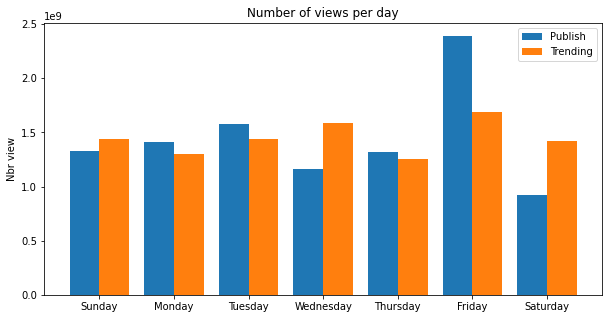

In [26]:
fig = plt.figure(figsize = (10, 5))

x = np.arange(len(week))
plt.bar(x - 0.2, viewPublish, width=0.4, label='Publish')
plt.bar(x + 0.2, viewTrending, width=0.4, label='Trending')

plt.ylabel('Nbr view')
plt.title('Number of views per day')
plt.xticks(x, week)
plt.legend()

plt.show()

**Weekly evolution of view's number**

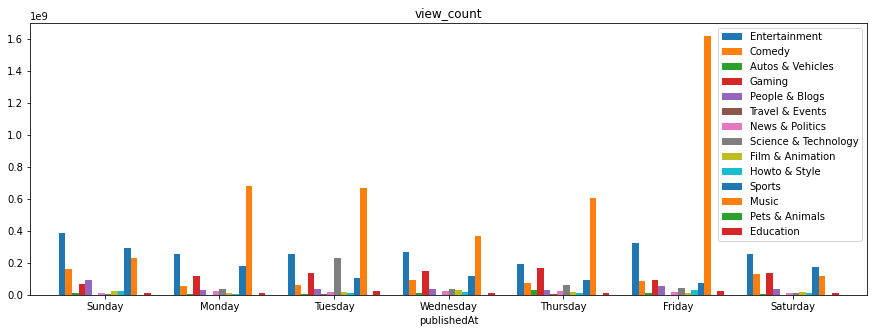

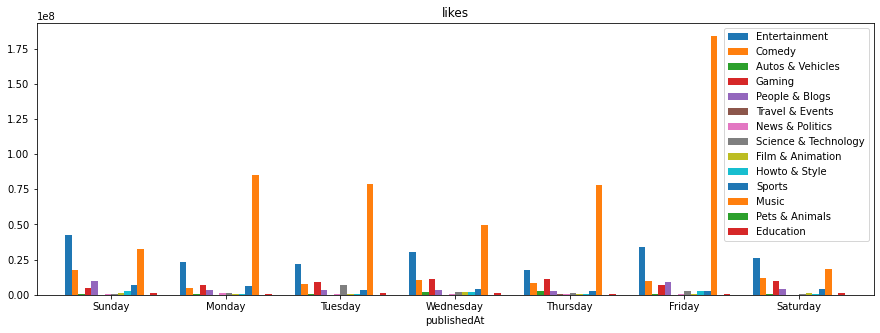

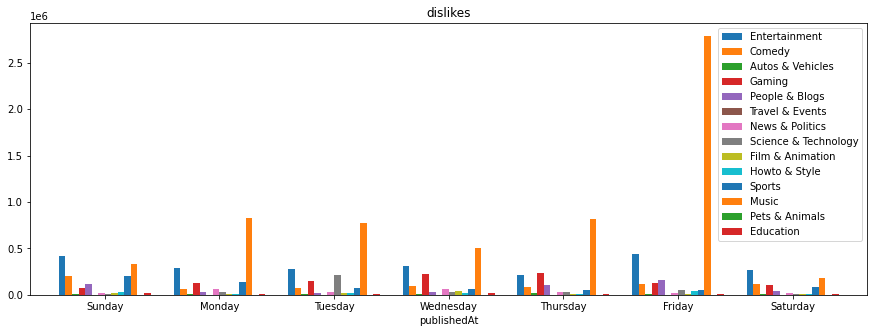

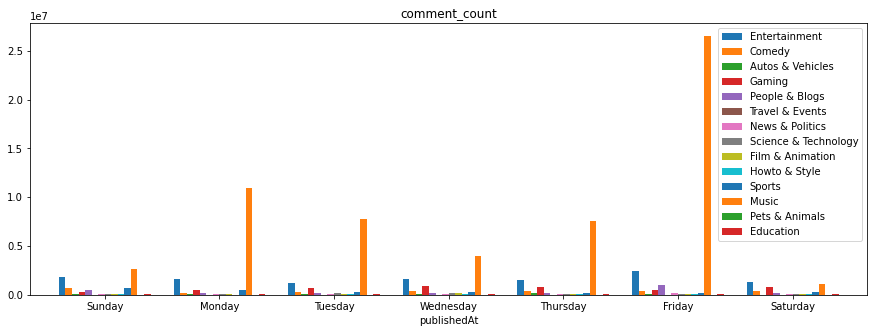

In [27]:

def dataPerDayPlot(df, typec):
    for i in range(len(typec)):
        data = df.groupby(['categoryId', 'publishedAt'])[typec[i]].sum()
        
        week=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
        category = list(set(data.index.get_level_values(0)))
        dfPerday = pd.DataFrame()

        plt.rcParams['figure.figsize'] = [15, 5]

        for j in category:
            dfPerday.loc[:, j] = data[j][:]
        dfPerday.plot.bar(width=0.8, rot=0)
        plt.xticks([0,1,2,3,4,5,6], week)
        plt.legend(title_fontsize='x-small')
        plt.title(typec[i])

    plt.show()

typec = ['view_count', 'likes', 'dislikes','comment_count']
dataPerDayPlot(df1, typec)

### Monthly evolution of view's number

In [28]:
df_month = pd.read_csv("./Data/FR_youtube_trending_data.csv")
df_month['categoryId'] = df_month['categoryId'].apply(lambda x: get_nameCategory(int(x)))
df_month['publishedAt'] = df_month['publishedAt'].apply(lambda x: get_only_date(x))

In [29]:
df_month.drop_duplicates(subset ="video_id", keep = 'first', inplace=True)
df2 = df_month.groupby(['publishedAt'])['view_count'].sum()
df2.head()

publishedAt
2020-08-03      1048314
2020-08-05      1767936
2020-08-06     16768298
2020-08-07    117463669
2020-08-08     23032047
Name: view_count, dtype: int64

In [30]:
def monthNum(date):
    date = date.split('-')
    #date = list(map(lambda x : int(x), date))
    return str(date[0])+'-'+str(date[1])

df_month['publishedAt'] = df_month['publishedAt'].apply(lambda x: monthNum(x))

In [31]:
df_monthGlo = df_month.groupby(['publishedAt'])['view_count'].sum()
df_monthCategory = df_month.groupby(['categoryId', 'publishedAt'])['view_count'].sum()

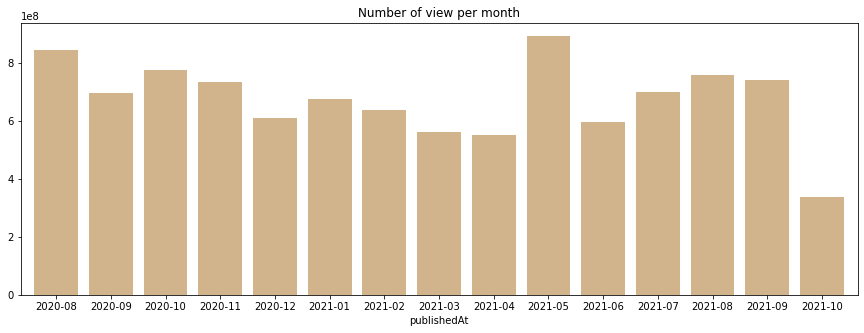

In [32]:
plt.rcParams['figure.figsize'] = [15, 5]

df_monthGlo.plot.bar(width=0.8, rot=0, color='tan')
plt.title('Number of view per month')
plt.show()

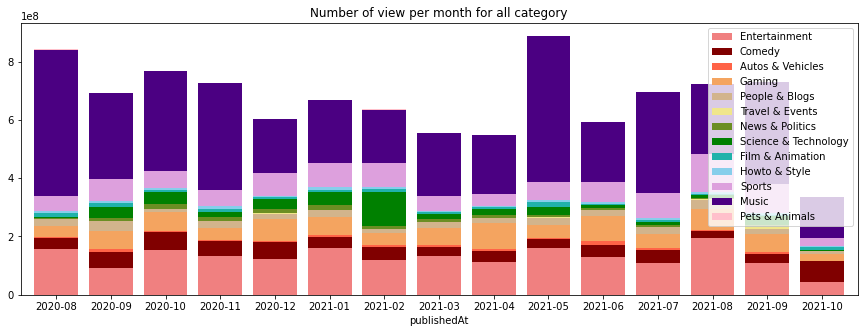

In [33]:
category = list(set(df_monthCategory.index.get_level_values(0)))
colorList = ['lightcoral', 'maroon', 'tomato', 
                'sandybrown', 'tan', 'khaki', 
                'olivedrab', 'green', 'lightseagreen', 
                'skyblue', 'plum', 'indigo', 
                'pink', 'gold', 'azure', 'forestgreen', 'royalblue']
bot = np.zeros(15)
for i in range(1,len(category)):
    df_monthCategory[category[i-1]].plot.bar(width=0.8, rot=0, color=colorList[i-1], bottom=bot)
    bot = list(map(lambda x, y : x+y, bot, df_monthCategory[category[i-1]]))

plt.title('Number of view per month for all category')
plt.legend(category)   
plt.show()